In [1]:
!pip install selenium


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver


In [3]:
macbook_air=[]


In [4]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   


In [5]:
macbook_air

["\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i did not felt about it compared to the performance it was given. Also fingerprint wont be noticeable if the screen is onI thought of buying a screen card for mac (actually I purchased on amazon) to prote

In [6]:
len(macbook_air)


400

In [7]:
rev={"review":macbook_air}


In [8]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)


In [9]:
review_data


,review
0,\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i ...
1,"\nValue for money laptopIf u r looking for programming this is the oneIt has better power efficiency,better screen quality, smooth & fast UI & small in sizeM1 is still better option... M2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
2,"\nLoved everything about this one. This one was a love at first sight but took me years to buy. I am really happy with the delivery and genuineness and it was worth it for INR 82,990. Thank you Amazon.\n"
3,\nHinge issues... Sometimes don't open by single handed... Rest everything is heaven\n
4,\nIt is so faster than windows laptop. And download and upload are just a click away. I was using Windows now became a macbook user and i am fully satisfied with Macbook Air M1.It's a total different machine for Windows Users but it is faster and secure than Windows.. Just Go For It.....\n
...,...
395,\n\n\n\n\n The media could not be loaded.\n \n\n\n
396,\nAmazing macbook. I loved it.\n
397,\nDone a good job till now no issues with the product and best laptop on the market must look about it\n
398,\nOne of the best if not the bestVery good fanless machine.\n


In [10]:
text=" ".join(review_data)


In [11]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)


In [12]:
review_data


,review
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n"
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n
4,\nit is so faster than windows laptop. and download and upload are just a click away. i was using windows now became a macbook user and i am fully satisfied with macbook air m1.it's a total different machine for windows users but it is faster and secure than windows.. just go for it.....\n
...,...
395,\n the media could not be loaded.\n \n
396,\namazing macbook. i loved it.\n
397,\ndone a good job till now no issues with the product and best laptop on the market must look about it\n
398,\none of the best if not the bestvery good fanless machine.\n


In [13]:
text=" ".join(review_data["review"])


In [14]:
text

'\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i did not felt about it compared to the performance it was given. also fingerprint wont be noticeable if the screen is oni thought of buying a screen card for mac (actually i purchased on amazon) to protec

In [15]:
text_tokens = word_tokenize(text)


In [16]:
text_tokens


['i',
 'was',
 'using',
 'macbook',
 'air',
 'early',
 '2015',
 'before',
 '.',
 'it',
 'was',
 'performing',
 'ok',
 'since',
 'i',
 'purchased',
 'until',
 '2022.',
 'but',
 'i',
 'started',
 'facing',
 'unexpected',
 'shutdown',
 'due',
 'to',
 'poor',
 'battery',
 'condition',
 '.',
 'hence',
 'i',
 'upgraded',
 'to',
 'm1',
 'mac',
 'in',
 'exchange',
 'offer',
 '.',
 'i',
 'got',
 'around',
 '18k',
 'exchange',
 'value',
 'which',
 'was',
 'surprising',
 'for',
 'me.after',
 'i',
 'started',
 'using',
 'this',
 'i',
 'fell',
 'in',
 'love',
 'with',
 'this',
 'due',
 'to',
 'following',
 'pros1',
 '.',
 'excellent',
 'battery',
 'life',
 '(',
 'mora',
 'than',
 '12',
 'hours',
 'continues',
 'usage',
 ')',
 '2.',
 'excellent',
 'performance',
 'compared',
 'to',
 'my',
 'previous',
 'macbook',
 '2015',
 'model',
 '(',
 'more',
 'than',
 '200',
 '%',
 'bump',
 'in',
 'performance',
 'i',
 'felt',
 ')',
 '3.',
 'excellent',
 'display',
 'qualityi',
 'did',
 'not',
 'feel',
 'any',


In [17]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]


In [18]:
tf=TfidfVectorizer()


In [19]:
text_tf=tf.fit_transform(text_without_sw)


In [20]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)


D:\anaconda\nik\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df

,000,10,100,1000,10finally,10get,10hours,10i,10k,10light,...,xps,year,years,yesterday,yet,you,youtube,yrs,yu,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
words_list=" ".join(df)


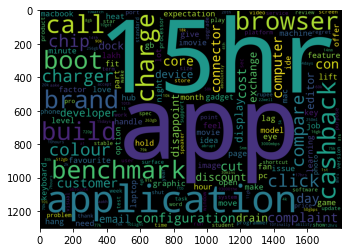

In [23]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)


In [24]:
with open (r"D:\Data Science Assignment\text mining\positive-words.txt") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [25]:
with open (r"D:\Data Science Assignment\text mining\negative-words.txt") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]   


In [26]:
neg_text=" ".join([word for word in df if not word in negative_words])


In [27]:
pos_text=" ".join([word for word in df if not word  in positive_words])


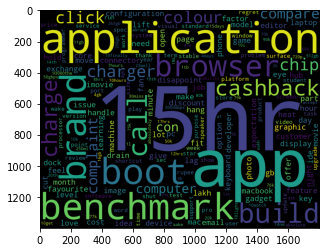

In [28]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)


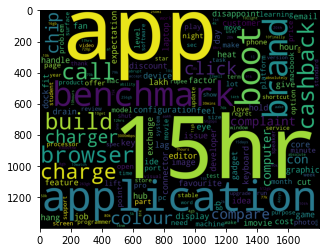

In [29]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)


In [30]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data


,review,subjectivity,polarity
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n,0.357143,-0.035714
4,\nit is so faster than windows laptop. and download and upload are just a click away. i was using windows now became a macbook user and i am fully satisfied with macbook air m1.it's a total different machine for windows users but it is faster and secure than windows.. just go for it.....\n,0.737500,0.225000
...,...,...,...
395,\n the media could not be loaded.\n \n,0.000000,0.000000
396,\namazing macbook. i loved it.\n,0.850000,0.650000
397,\ndone a good job till now no issues with the product and best laptop on the market must look about it\n,0.450000,0.850000
398,\none of the best if not the bestvery good fanless machine.\n,0.450000,0.850000


In [31]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716,Positive
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333,Positive
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000,Positive
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n,0.357143,-0.035714,Negative
4,\nit is so faster than windows laptop. and download and upload are just a click away. i was using windows now became a macbook user and i am fully satisfied with macbook air m1.it's a total different machine for windows users but it is faster and secure than windows.. just go for it.....\n,0.737500,0.225000,Positive
...,...,...,...,...
395,\n the media could not be loaded.\n \n,0.000000,0.000000,Neutral
396,\namazing macbook. i loved it.\n,0.850000,0.650000,Positive
397,\ndone a good job till now no issues with the product and best laptop on the market must look about it\n,0.450000,0.850000,Positive
398,\none of the best if not the bestvery good fanless machine.\n,0.450000,0.850000,Positive


In [32]:
review_data['analysis'].value_counts()


Positive    322
Neutral      52
Negative     26
Name: analysis, dtype: int64

In [33]:
#positive comments
((228+33)/280)*100


93.21428571428572

In [34]:
#negative comments
(19/199)*100


9.547738693467336